#  Proactive V

In [1]:
from radd import build, vis
from radd.toolbox import analyze

In [2]:
d = 'FinalPro/v'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)

In [3]:
m = build.Model(data=prodata, kind='xpro', dynamic='hyp', tb=.555, depends_on={'v':'pGo'}, wt_prob=True)
m.optimize(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)

basinhopping step 0: f 0.00202651
basinhopping step 1: f 0.0935589 trial_f 0.0935589 accepted 1  lowest_f 0.00202651
basinhopping step 2: f 0.235962 trial_f 0.235962 accepted 1  lowest_f 0.00202651
basinhopping step 3: f 0.0449945 trial_f 0.0449945 accepted 1  lowest_f 0.00202651
basinhopping step 4: f 0.0674123 trial_f 0.0674123 accepted 1  lowest_f 0.00202651
basinhopping step 5: f 0.0674123 trial_f 0.171875 accepted 0  lowest_f 0.00202651
basinhopping step 6: f 0.13237 trial_f 0.13237 accepted 1  lowest_f 0.00202651
basinhopping step 7: f 0.272084 trial_f 0.272084 accepted 1  lowest_f 0.00202651
basinhopping step 8: f 0.210977 trial_f 0.210977 accepted 1  lowest_f 0.00202651
basinhopping step 9: f 0.272192 trial_f 0.272192 accepted 1  lowest_f 0.00202651
adaptive stepsize: acceptance rate 0.800000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.353424 trial_f 0.353424 accepted 1  lowest_f 0.00202651
basinhopping step 11: f 0.4394 trial_f 0.4394 acc

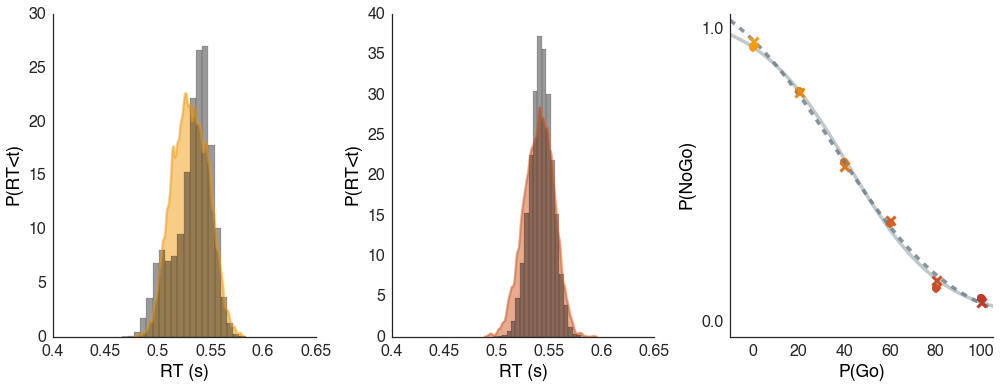

In [23]:
vis.plot_fits(m.avg_y, m.fits, kind='pro')

In [ ]:
f

In [ ]:
tr = array([ 0.93277,  0.79712,  0.51741,  0.37875,  0.13265,  0.09424,
        0.46173,  0.48873,  0.50597,  0.52497,  0.54273,  0.50455,
        0.52355,  0.53431,  0.54355,  0.55055])
a = array([ 0.95558,  0.83253,  0.52041,  0.35834,  0.13806,  0.10384,
        0.46871,  0.49071,  0.50871,  0.52371,  0.54171,  0.50171,
        0.52371,  0.53571,  0.54571,  0.55271])
vtr = array([ 0.95438,  0.82653,  0.56783,  0.33133,  0.12785,  0.10204,
        0.50045,  0.51288,  0.52445,  0.53461,  0.54688,  0.53148,
        0.53948,  0.54348,  0.54891,  0.55319])
v = array([ 0.96098,  0.78391,  0.53121,  0.34754,  0.14526,  0.06963,
        0.51113,  0.52213,  0.53113,  0.53913,  0.55013,  0.52413,
        0.53513,  0.54213,  0.54813,  0.55213])

In [108]:
data=prodata
from radd.toolbox import analyze

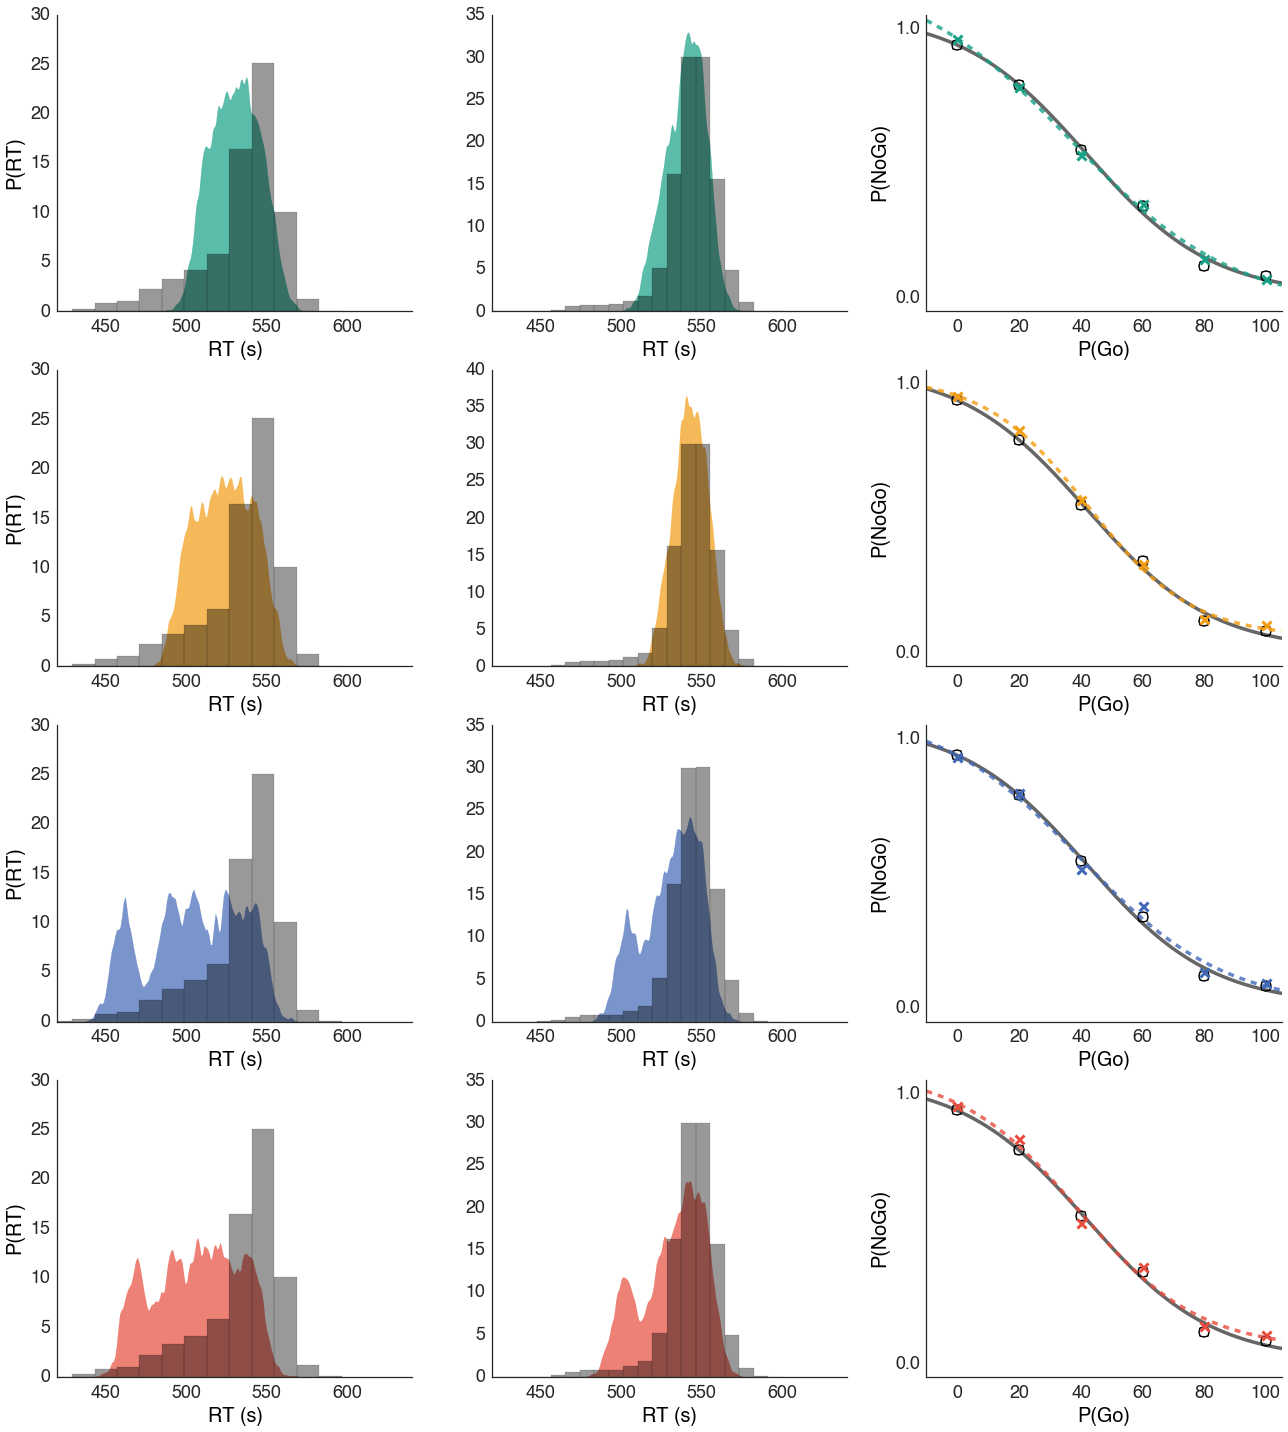

In [115]:
sns.set_context('notebook', font_scale=1.8)
#f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14, 5.5), sharey=False)
f, axes = plt.subplots(4,3,figsize=(18, 20), sharey=False)

tr = array([ 0.93277,  0.79712,  0.51741,  0.37875,  0.13265,  0.09424,
        0.46173,  0.48873,  0.50597,  0.52497,  0.54273,  0.50455,
        0.52355,  0.53431,  0.54355,  0.55055])
a = array([ 0.95558,  0.83253,  0.52041,  0.35834,  0.13806,  0.10384,
        0.46871,  0.49071,  0.50871,  0.52371,  0.54171,  0.50171,
        0.52371,  0.53571,  0.54571,  0.55271])
vtr = array([ 0.95438,  0.82653,  0.56783,  0.33133,  0.12785,  0.10204,
        0.50045,  0.51288,  0.52445,  0.53461,  0.54688,  0.53148,
        0.53948,  0.54348,  0.54891,  0.55319])
v = array([ 0.96098,  0.78391,  0.53121,  0.34754,  0.14526,  0.06963,
        0.51113,  0.52213,  0.53113,  0.53913,  0.55013,  0.52413,
        0.53513,  0.54213,  0.54813,  0.55213])


emp_kq = lambda rts: analyze.kde_fit_quantiles(mq(rts, prob=np.arange(0,1,.02)), bw=.01)
hi_rts = data.query('response==1 & pGo>.5').rt.values
lo_rts = data.query('response==1 & pGo<.5').rt.values
dat_cq = emp_kq(hi_rts)
dat_eq = emp_kq(lo_rts)

labels = ['Boundary', 'Onset', 'Drift+Onset', 'Drift'][::-1]
mcpals = [rpal(6), bpal(6), heat(6), cool(6)][::-1]
pals = [ "#e74c3c", "#4168B7", "#f39c12", "#16a085"][::-1]

for i, yhat in enumerate([a, tr, vtr, v][::-1]):
      
      ax1, ax2, ax3 = axes[i]
      # set parameters for simulated plots
      shade=True; alpha=.5; bw=.001; lw=2.5; ls='-'
      sns.distplot(dat_cq, kde=False, color='k', norm_hist=True, ax=ax1, bins=30)
      sns.distplot(dat_eq, kde=False, color='k', norm_hist=True, ax=ax2, bins=70)
      plot_params={'shade':shade, 'alpha':alpha, 'bw':bw, 'lw':lw, 'ls':ls}

      vis.plot_fits(m.avg_y, yhat, plot_params=plot_params, axes=[ax1,ax2,ax3], mc=mcpals[i], kind='pro', colors=[pals[i]]*2)

for ax in axes.flatten():
      if ax.is_last_col():
            continue
      ax.set_xlim(.42, .64)
      if ax.is_first_col():
            ax.set_ylabel('P(RT)')
      #if ax.is_last_row():
      ax.set_xlabel('RT (s)')
      ax.set_xticklabels([int(xx) for xx in ax.get_xticks()*1000])

In [116]:
m.avg_y

array([ 0.93996,  0.79037,  0.54775,  0.33996,  0.11803,  0.08139,
        0.50343,  0.53158,  0.54094,  0.54427,  0.54527,  0.53376,
        0.54393,  0.5447 ,  0.54517,  0.54533])

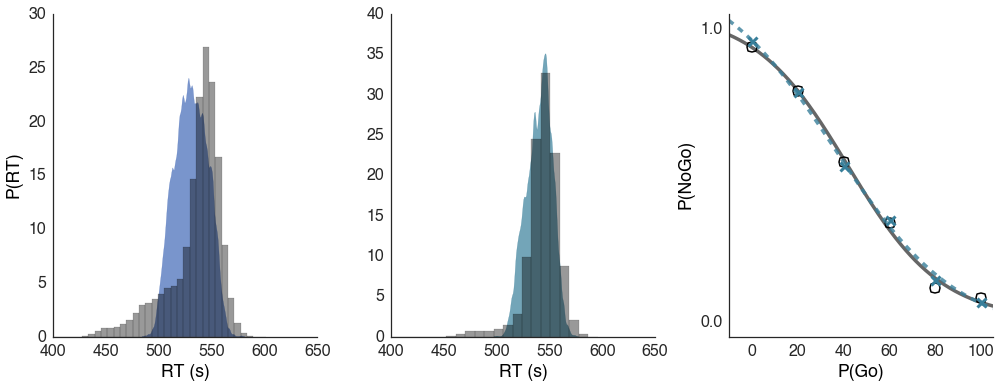

In [114]:
vis.plot_fits(m.avg_y, m.fits, kind='pro', data=prodata)
plt.savefig('v_profits.png')

In [25]:
tr = array([ 0.93277,  0.79712,  0.51741,  0.37875,  0.13265,  0.09424,
        0.46173,  0.48873,  0.50597,  0.52497,  0.54273,  0.50455,
        0.52355,  0.53431,  0.54355,  0.55055])
a = array([ 0.95558,  0.83253,  0.52041,  0.35834,  0.13806,  0.10384,
        0.46871,  0.49071,  0.50871,  0.52371,  0.54171,  0.50171,
        0.52371,  0.53571,  0.54571,  0.55271])
vtr = array([ 0.95438,  0.82653,  0.56783,  0.33133,  0.12785,  0.10204,
        0.50045,  0.51288,  0.52445,  0.53461,  0.54688,  0.53148,
        0.53948,  0.54348,  0.54891,  0.55319])
v = array([ 0.96098,  0.78391,  0.53121,  0.34754,  0.14526,  0.06963,
        0.51113,  0.52213,  0.53113,  0.53913,  0.55013,  0.52413,
        0.53513,  0.54213,  0.54813,  0.55213])

In [117]:
d = 'FinalPro/v_no_dynamics'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)

m = build.Model(data=prodata, kind='pro', tb=.555, depends_on={'v':'pGo'}, wt_prob=True)
m.optimize(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)

basinhopping step 0: f 0.146323
basinhopping step 1: f 0.0196546 trial_f 0.0196546 accepted 1  lowest_f 0.0196546
found new global minimum on step 1 with function value 0.0196546
basinhopping step 2: f 0.00280774 trial_f 0.00280774 accepted 1  lowest_f 0.00280774
found new global minimum on step 2 with function value 0.00280774
basinhopping step 3: f 0.216555 trial_f 0.216555 accepted 1  lowest_f 0.00280774
basinhopping step 4: f 0.0156715 trial_f 0.0156715 accepted 1  lowest_f 0.00280774
basinhopping step 5: f 0.0156715 trial_f 0.291267 accepted 0  lowest_f 0.00280774
basinhopping step 6: f 0.0469256 trial_f 0.0469256 accepted 1  lowest_f 0.00280774
basinhopping step 7: f 0.02783 trial_f 0.02783 accepted 1  lowest_f 0.00280774
basinhopping step 8: f 0.0014071 trial_f 0.0014071 accepted 1  lowest_f 0.0014071
found new global minimum on step 8 with function value 0.0014071
basinhopping step 9: f 0.0014071 trial_f 0.249569 accepted 0  lowest_f 0.0014071
adaptive stepsize: acceptance rate

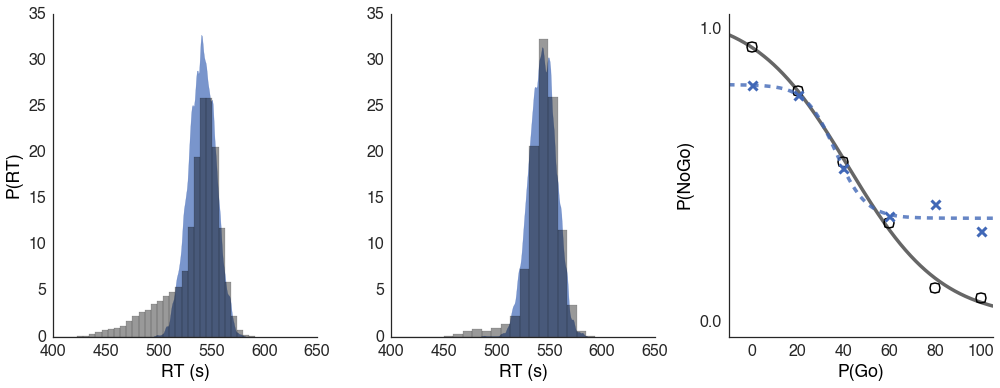

In [118]:
vis.plot_fits(m.avg_y, m.fits,kind='pro', data=prodata)

In [143]:
def assess_fit(finfo):
      
      finfo = pd.Series(finfo)
      chisqr = finfo.chi
      nfree = finfo.ndata - finfo.nvarys
      finfo['rchi'] = chisqr / nfree

      log_likelihood = finfo.ndata * np.log(finfo.rchi)
      finfo['AIC'] = log_likelihood + 2 * finfo.nvarys
      finfo['BIC'] = log_likelihood + np.log(finfo.ndata * finfo.nvarys)
      
      return finfo

In [123]:
mx.inits

{'a': 0.44470913,
 'ssv': -0.9415135,
 'tr': 0.30481227,
 'v': 1.07049551,
 'z': 0.15049553}

In [181]:
mx=build.Model(kind='xpro', data=prodata)

In [182]:
len(mx.avg_y)

16

In [163]:
mx.make_optimizer(ntrials=100, maxfev=20, tol=1.e-2)
opt = mx.opt


In [141]:
finfo['nfree']

-4

In [136]:
finfo['chi']/finfo['nfree']

-6.7933547143184114e-07

In [137]:
finfo['rchi']

-6.7933547143184114e-07

In [133]:
finfo['residual']

array([ 0.02689], dtype=float32)

In [168]:
opt.inits

{'a': 0.44470913,
 'ssv': -0.9415135,
 'tr': 0.30481227,
 'v': 1.07049551,
 'z': 0.15049553}

In [179]:
y, finfo, popt = opt.gradient_descent(inits=opt.inits, is_flat=True)

In [ ]:
nvary=2
ndata=32
chi=


In [210]:
m.residual

array([ 0.19034], dtype=float32)

In [190]:
finfo['chi']=0.00726
finfo['nvary']=2
finfo['ndata']=32
finfo = analyze.assess_fit(finfo)
finfo

a         0.44274
chi       0.00726
cnvrg       False
ndata          32
nfev           23
nvary           2
ssv       -0.9081
tr        0.30456
v          1.0524
z          0.1568
df             30
rchi     0.000242
AIC       -262.45
BIC       -262.29
logp      -266.45
dtype: object

In [ ]:
0.036228418
9.090871e-05

In [221]:
finfo['chi']=0.0049209100527205941
finfo['nvary']=14
finfo['ndata']=16
finfo = analyze.assess_fit(finfo)
finfo

a          0.44274
chi      0.0049209
cnvrg        False
ndata           16
nfev            23
nvary           14
ssv        -0.9081
tr         0.30456
v           1.0524
z           0.1568
df               2
rchi     0.0024605
AIC        -68.119
BIC        -90.707
logp       -96.119
dtype: object

In [233]:
finfo['chi']=0.013717243423179546
finfo['nvary']=9
finfo['ndata']=16
finfo = analyze.assess_fit(finfo)
finfo

a          0.44274
chi       0.013717
cnvrg        False
ndata           16
nfev            23
nvary            9
ssv        -0.9081
tr         0.30456
v           1.0524
z           0.1568
df               7
rchi     0.0019596
AIC         -81.76
BIC         -94.79
logp        -99.76
dtype: object

In [186]:
m.fitinfo

{'AIC': nan,
 'BIC': nan,
 'CNVRG': False,
 'a': 0.3806480251241918,
 'chi': 0.036228418,
 'nfev': 3348,
 'rchi': -0.007245683670043945,
 'tr': 0.3710684265509115,
 'v_0': 1.907538573295269,
 'v_100': 2.1483622109213543,
 'v_20': 1.9344443936133191,
 'v_40': 2.049353963196761,
 'v_60': 2.1243936121991145,
 'v_80': 2.1172771879567023,
 'xb': 1.0}

In [139]:
finfo['ndata']=len(m.opt.simulator.y)

In [140]:
finfo['ndata']

16

In [142]:
finfo

{'AIC': nan,
 'BIC': nan,
 'CNVRG': False,
 'a': 0.44223196205325838,
 'chi': 2.7173419e-06,
 'ndata': 16,
 'nfev': 26,
 'nfree': -4,
 'nvarys': 5,
 'rchi': -6.7933547143184114e-07,
 'ssv': -0.94568094939010239,
 'tr': 0.30466124002951783,
 'v': 1.082546995874772,
 'z': 0.14573224309045227}

In [231]:
yhat = array([0.9327, 0.7971, 0.5174, 0.3787, 0.1326, 0.0942, 0.4617, 0.4887, 0.5059, 0.5249, 0.5427, 0.5045, 0.5235, 0.5343, 0.5435, 0.5505])
y = array([0.9399, 0.7903, 0.5477, 0.3399, 0.1180, 0.0813, 0.5034, 0.5315, 0.5409, 0.5442, 0.5452, 0.5337, 0.5439, 0.5446, 0.5451, 0.5453])


In [232]:
np.sum(((y-yhat)**2)*m.avg_wts)

0.013717243423179546